In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("C:/Users/Kashi/Documents/formación/ciencia de datos/proyeectos/linear_regression\Advertising.csv", index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


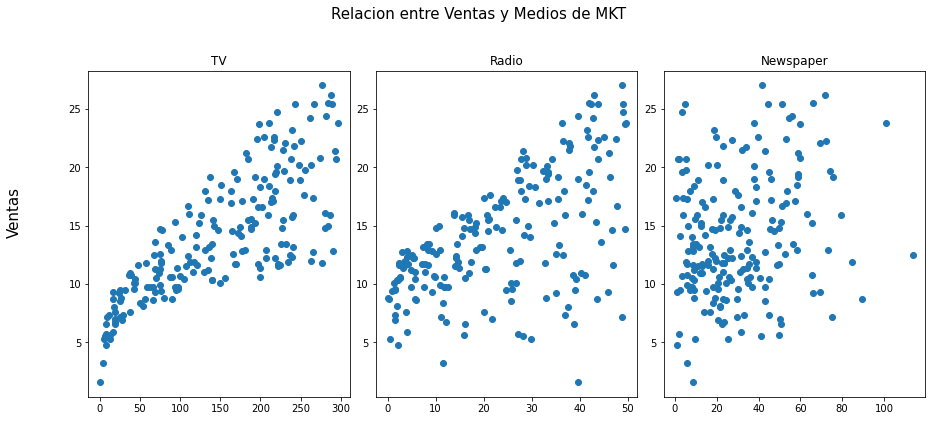

In [7]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3, figsize=(15, 6),sharex="col")
fig.text(x = 0.35,y= 1,s="Relacion entre Ventas y Medios de MKT",fontsize=15,)
fig.text(0.05, 0.5, "Ventas", rotation ="vertical", fontsize=15)
ax0.scatter(data=df,x="TV",y="sales")
ax0.set_title("TV")
ax1.scatter(data=df,x="radio",y="sales")
ax1.set_title("Radio")
ax2.scatter(data=df,x="newspaper",y="sales")
ax2.set_title("Newspaper")
plt.subplots_adjust(wspace =0.1)


In [8]:
X=df.TV.values.reshape(-1,1)
Y=df.sales.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print(f"La funcion lineal de las ventas determina: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*$TV")

La funcion lineal de las ventas determina: 
 Y = 7.032593549127693 + 0.047536640433019764*$TV


Text(0.5, 1.0, 'Relacion entre publicidad en TV y Ventas')

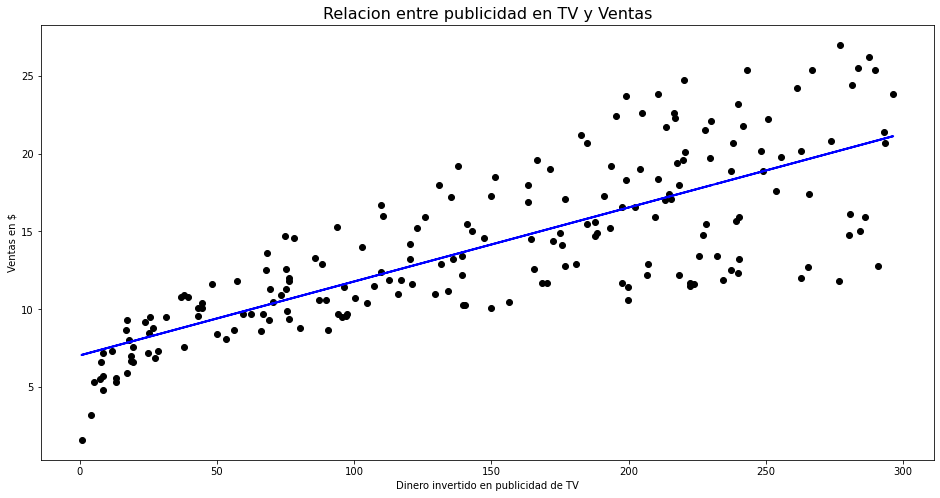

In [9]:
predicciones = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X,Y, c="black")
plt.plot(X,predicciones,c="b", linewidth=2)
plt.xlabel("Dinero invertido en publicidad de TV")
plt.ylabel("Ventas en $")
plt.title("Relacion entre publicidad en TV y Ventas",fontsize=16)

In [10]:
X=df.TV
Y=df.sales
exog = sm.add_constant(X)
est = sm.OLS(Y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        20:04:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

c:\Users\Kashi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
#Multiple linear regression
Xs = df.drop(["sales"], axis=1)
Y = df.sales.values.reshape(-1,1)
reg.fit(Xs, Y)


LinearRegression()

In [16]:
print(f"La funcion lineal de las ventas determina: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*$TV + {reg.coef_[0][1]}*$RADIO +{reg.coef_[0][2]}*$NEWSPAPER")

La funcion lineal de las ventas determina: 
 Y = 2.9388893694594067 + 0.04576464545539761*$TV + 0.18853001691820462*$RADIO +-0.0010374930424762972*$NEWSPAPER


In [22]:
X = np.column_stack((df.TV,df.radio,df.newspaper))
Y =df.sales.values.reshape(-1,1)
exog = sm.add_constant(X)
est = sm.OLS(Y, exog).fit()

print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        20:12:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0